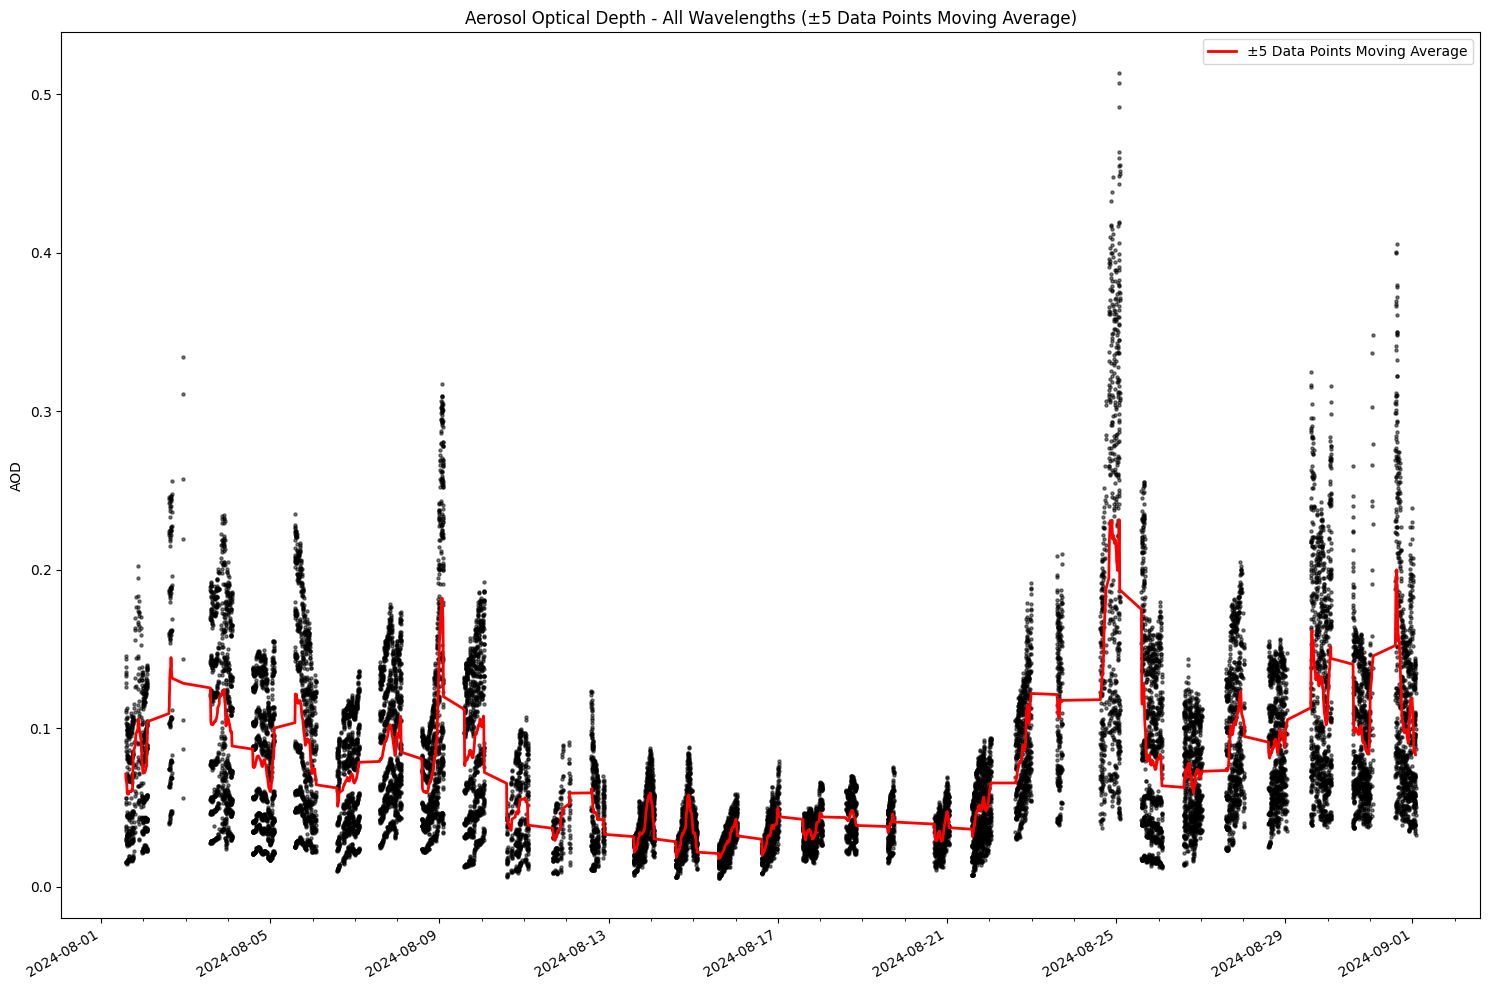

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

# Function to read and process AERONET data
def read_aeronet(filename):
    df = pd.read_csv(filename, skiprows=6, na_values=['-999.000000', '-999.'])
    df['datetime'] = pd.to_datetime(df['Date(dd:mm:yyyy)'] + ' ' + df['Time(hh:mm:ss)'],
                                    format='%d:%m:%Y %H:%M:%S')
    return df

# Manual moving average function using a for loop
def manual_moving_average(data, window_size):
    result = np.zeros(len(data))
    half_window = window_size // 2
    for i in range(len(data)):
        start = max(0, i - half_window)
        end = min(len(data), i + half_window + 1)
        result[i] = np.mean(data[start:end])
    return result

# Path to the AERONET data file
filename = 'Tdata24.lev15'

# Read and process the data
df = read_aeronet(filename)
df = df.sort_values('datetime')

# Identify all AOD columns
aod_columns = [col for col in df.columns if col.startswith('AOD_') and col.endswith('nm')]

# Calculate the average AOD across all wavelengths
df['AOD_avg'] = df[aod_columns].mean(axis=1)

# Define window size (±5 data points)
window_size = 11  # 5 points before, 1 current point, 5 points after

# Calculate moving average using the manual method
df['AOD_MA'] = manual_moving_average(df['AOD_avg'].fillna(0).values, window_size)

# Plot the data with individual AOD measurements and the moving average
plt.figure(figsize=(15, 10))

# Plot individual AOD measurements without adding them to the legend
for col in aod_columns:
    plt.scatter(df['datetime'], df[col], color='black', s=5, alpha=0.5)

# Plot moving average and include only this in the legend
plt.plot(df['datetime'], df['AOD_MA'], color='red', linewidth=2, label='±5 Data Points Moving Average')

plt.ylabel('AOD')
plt.title('Aerosol Optical Depth - All Wavelengths (±5 Data Points Moving Average)')
plt.legend()

# Format x-axis
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

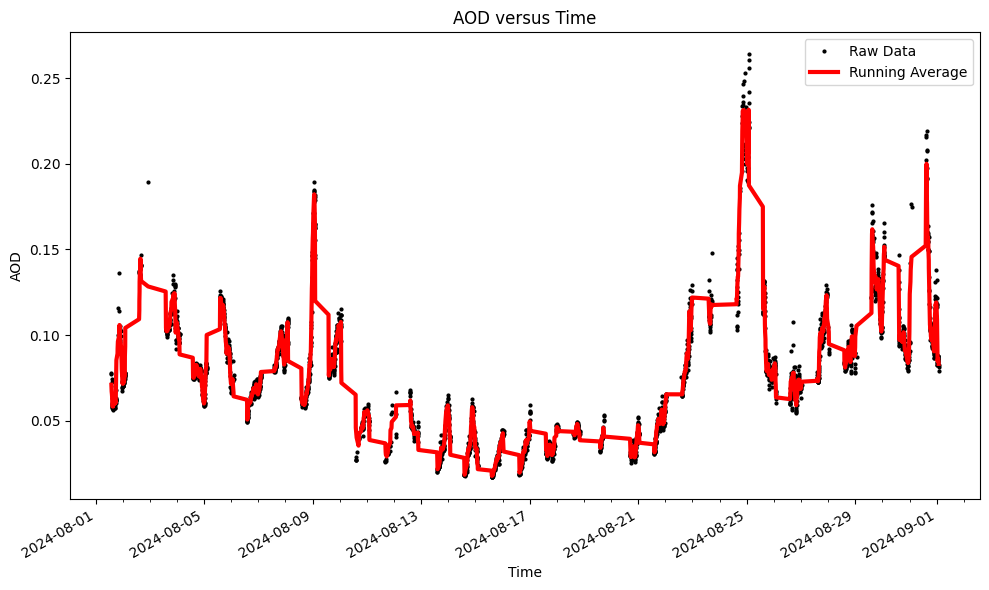

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

# Function to read and process AERONET data
def read_aeronet(filename):
    df = pd.read_csv(filename, skiprows=6, na_values=['-999.000000', '-999.'])
    df['datetime'] = pd.to_datetime(df['Date(dd:mm:yyyy)'] + ' ' + df['Time(hh:mm:ss)'],
                                    format='%d:%m:%Y %H:%M:%S')
    return df

# Path to the AERONET data file
filename = 'Tdata24.lev15'

# Read and process the data
data = read_aeronet(filename)
data = data.sort_values('datetime')

# Identify all AOD columns
aod_columns = [col for col in data.columns if col.startswith('AOD_') and col.endswith('nm')]

# Calculate the average AOD across all wavelengths
data['AOD_avg'] = data[aod_columns].mean(axis=1)

# Create a numpy array for the running average
runAvg = np.zeros(len(data))

# Set the window size (equivalent to r in the original code)
r = 5

# Calculate the running average
for irow in range(len(data)):
    dataAvg = 0
    nAvg = 0
    for m in range(-r, r+1):
        if 0 <= irow+m < len(data):
            nAvg += 1
            dataAvg += data['AOD_avg'].iloc[irow+m]
    dataAvg = dataAvg / nAvg if nAvg > 0 else 0
    runAvg[irow] = dataAvg

# Plotting
plt.figure(figsize=[10, 6])
plt.plot(data['datetime'], data['AOD_avg'], 'ok', label="Raw Data", markersize=2)
plt.plot(data['datetime'], runAvg, color="red", lw=3, label="Running Average")
plt.xlabel("Time")
plt.ylabel("AOD")
plt.title("AOD versus Time (wing code)")
plt.legend()
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()